In [37]:
import datetime
from datetime import timedelta, date
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.ticker as ticker
from matplotlib import rcParams
from IPython.display import Markdown as md, display

# Title paddings
rcParams['axes.titlepad'] = 25 

%matplotlib inline
sns.set(style="darkgrid", font_scale=1.5, rc={"lines.linewidth": 2.5})

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")

In [3]:
df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,0,0,1,1,1,2,4,4,4,4
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,2,2,2,4,5,5,6,8,10,10
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,11,15,17,17,19,21,25,26,29,31
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,0,0,1,1,1,1,3,3,3,6
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,NaN,Burma,21.9162,95.9560,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
249,Anguilla,United Kingdom,18.2206,-63.0686,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
250,British Virgin Islands,United Kingdom,18.4207,-64.6400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
251,Turks and Caicos Islands,United Kingdom,21.6940,-71.7979,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
series = df[df.columns[4:]].sum()

In [5]:
deaths_by_date = pd.DataFrame({'date':series.index, 'deaths':series.values})

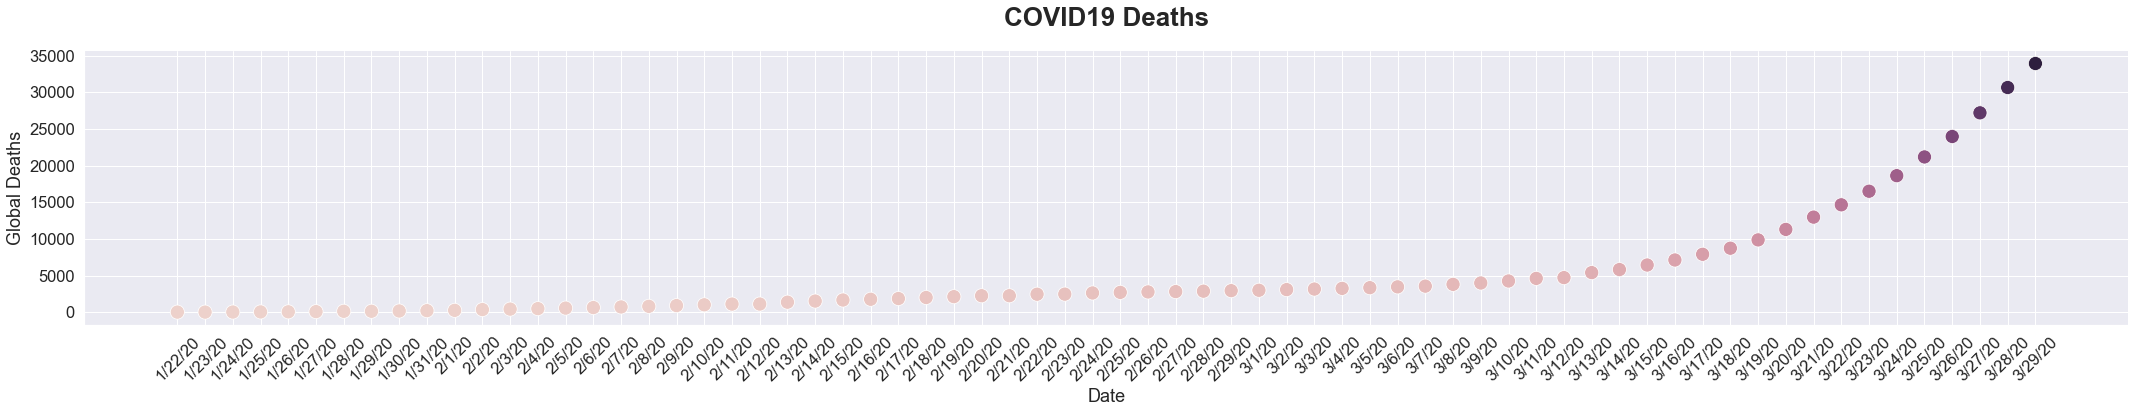

In [6]:
chart = sns.relplot(x="date", y="deaths", hue="deaths", height=5, aspect=6, s=200, data=deaths_by_date, legend=None)
chart.set_xticklabels(rotation=45)
chart.set(xlabel='Date', ylabel='Global Deaths')
plt.title('COVID19 Deaths', fontsize = 26, weight='bold')
plt.show()

In [26]:
deaths_by_date_as_csv = deaths_by_date.to_csv(index=False)

In [32]:
deaths_by_date.to_csv('global-deaths-by-date.csv', index=False)

# Predictions

In [9]:
diff = datetime.date(2021,1,1) - datetime.date.today()
days_until_new_year = diff.days

In [10]:
data = list(zip(range(len(deaths_by_date.deaths.values)), deaths_by_date.deaths.values))

In [11]:
x = np.array(data)[:,0].reshape(-1,1)
y = np.array(data)[:,1].reshape(-1,1)

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=1, test_size=1, random_state=0)

In [13]:
# 5th Degree Polynomial Regression
pf = PolynomialFeatures(degree=5)
x_fitted = pf.fit_transform(x)
reg = LinearRegression()
reg.fit(x_fitted, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
total_days = len(deaths_by_date.deaths.values)

days_to_1M_deaths = 0
days_to_10M_deaths = 0
days_to_100M_deaths = 0

predictions_new_years = []
for i in range(total_days, total_days+days_until_new_year):
    p = int(reg.predict(pf.fit_transform([[i]]))[0][0])
    if p > 1000000 and days_to_1M_deaths == 0:
        days_to_1M_deaths = i - total_days
    if p > 10000000 and days_to_10M_deaths == 0:
        days_to_10M_deaths = i - total_days
    if p > 100000000 and days_to_100M_deaths == 0:
        days_to_100M_deaths = i - total_days
    predictions_new_years.append((i-total_days, p))
    
predictions_90 = []
for i in range(total_days, total_days+90):
    predictions_90.append((i-total_days, int(reg.predict(pf.fit_transform([[i]]))[0][0])))

In [38]:
end_date = date.today() + timedelta(days=days_to_1M_deaths)
display(md("## 1 million deaths will be reached on " + end_date.strftime("%b %d, %Y")))

## 1 million deaths will be reached on May 07, 2020

In [39]:
end_date = date.today() + timedelta(days=days_to_10M_deaths)
display(md("## 10 million deaths will be reached on " + end_date.strftime("%b %d, %Y")))

## 10 million deaths will be reached on Jun 24, 2020

In [40]:
end_date = date.today() + timedelta(days=days_to_100M_deaths)
display(md("## 100 million deaths will be reached on " + end_date.strftime("%b %d, %Y")))

## 100 million deaths will be reached on Sep 08, 2020

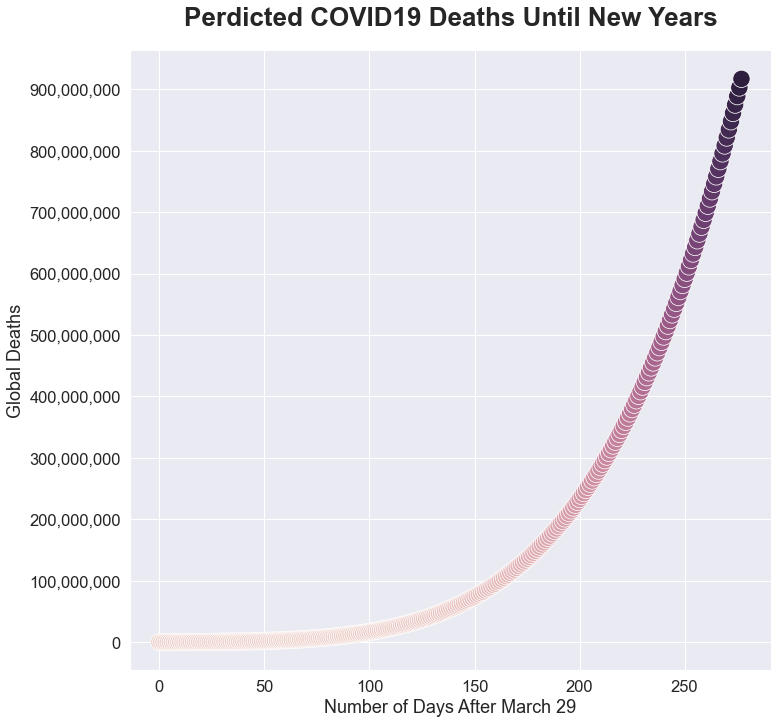

In [20]:
predictions_df = pd.DataFrame(predictions_new_years, columns=["day", "deaths"])
chart = sns.relplot(x="day", y="deaths", s=300, data=predictions_df, hue="deaths", height=10, aspect=1, legend=None)

chart.set(xlabel='Number of Days After March 29', ylabel='Global Deaths')
plt.title('Perdicted COVID19 Deaths Until New Years', fontsize = 26, weight='bold')

for ax in chart.axes[0]:
    ax.yaxis.set_major_locator(ticker.MultipleLocator(100000000))
    ax.yaxis.set_major_formatter(
        tkr.FuncFormatter(lambda x, p: "{:,}".format(int(x))))

In [21]:
chart.savefig("covid19-by-new-years.png")

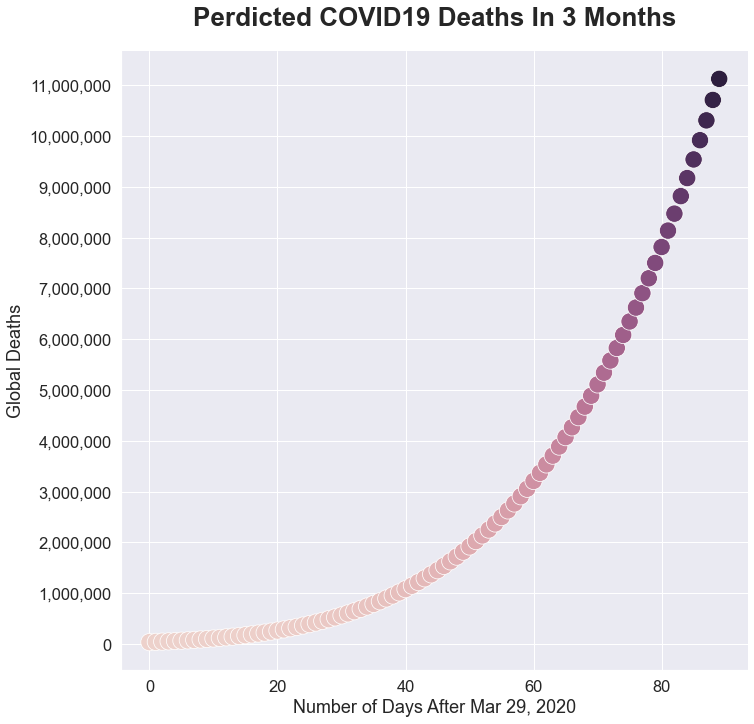

In [24]:
predictions_df = pd.DataFrame(predictions_90, columns=["day", "deaths"])
chart = sns.relplot(x="day", y="deaths", s=300, data=predictions_df, hue="deaths", height=10, aspect=1, legend=None)

chart.set(xlabel='Number of Days After %s' % date.today().strftime("%b %d, %Y"), ylabel='Global Deaths')
plt.title('Perdicted COVID19 Deaths In 3 Months', fontsize = 26, weight='bold')

for ax in chart.axes[0]:
#     ax.set(yscale="log")
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1000000))
    ax.yaxis.set_major_formatter(
        tkr.FuncFormatter(lambda x, p: "{:,}".format(int(x))))

In [25]:
chart.savefig("covid19-3-months.png")